Human Activity Recognition

데이터 탐색

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
feature_name_df = pd.read_csv('../00.data/UCI HAR Dataset/features.txt', sep='\s+',
                                header=None, names=['col_index','col_name'])
feature_name_df.head()

,col_index,col_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [4]:
feature_dup_df = feature_name_df.groupby('col_name').count()
feature_dup_df.head()

,col_index
col_name,
"angle(X,gravityMean)",1
"angle(Y,gravityMean)",1
"angle(Z,gravityMean)",1
"angle(tBodyAccJerkMean),gravityMean)",1
"angle(tBodyAccMean,gravity)",1


In [6]:
feature_dup_df[feature_dup_df['col_index'] > 1].head()

,col_index
col_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [7]:
feature_dup_df[feature_dup_df['col_index'] > 1].count()

col_index    42
dtype: int64

In [8]:

feature_cum_df = pd.DataFrame({'dup_cnt':feature_name_df.groupby('col_name').cumcount()})
feature_cum_df.reset_index(inplace=True)
feature_cum_df.head()

,index,dup_cnt
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [9]:
feature_name_df.head()

,col_index,col_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [10]:
new_df = pd.merge(feature_name_df.reset_index(), feature_cum_df)
new_df.head()

,index,col_index,col_name,dup_cnt
0,0,1,tBodyAcc-mean()-X,0
1,1,2,tBodyAcc-mean()-Y,0
2,2,3,tBodyAcc-mean()-Z,0
3,3,4,tBodyAcc-std()-X,0
4,4,5,tBodyAcc-std()-Y,0


In [11]:
new_df['col_name'] = new_df[['col_name', 'dup_cnt']].\
    apply(lambda x: x[0]+'_'+str(x[1]) if x[1] > 0 else x[0], axis=1)
new_df.head()

,index,col_index,col_name,dup_cnt
0,0,1,tBodyAcc-mean()-X,0
1,1,2,tBodyAcc-mean()-Y,0
2,2,3,tBodyAcc-mean()-Z,0
3,3,4,tBodyAcc-std()-X,0
4,4,5,tBodyAcc-std()-Y,0


In [12]:

new_df = new_df.drop(['index'], axis=1)
new_df.head()

,col_index,col_name,dup_cnt
0,1,tBodyAcc-mean()-X,0
1,2,tBodyAcc-mean()-Y,0
2,3,tBodyAcc-mean()-Z,0
3,4,tBodyAcc-std()-X,0
4,5,tBodyAcc-std()-Y,0


In [13]:
def get_new_feature_name_df(old_df):
    dup_df = pd.DataFrame({'dup_cnt':feature_name_df.groupby('col_name').cumcount()})
    new_df = pd.merge(old_df.reset_index(), dup_df.reset_index())
    new_df['col_name'] = new_df[['col_name', 'dup_cnt']].\
        apply(lambda x: x[0]+'_'+str(x[1]) if x[1] > 0 else x[0], axis=1)
    new_df = new_df.drop(['index'], axis=1)
    return new_df

In [14]:
new_feature_df = get_new_feature_name_df(feature_name_df)
new_feature_df.head()

,col_index,col_name,dup_cnt
0,1,tBodyAcc-mean()-X,0
1,2,tBodyAcc-mean()-Y,0
2,3,tBodyAcc-mean()-Z,0
3,4,tBodyAcc-std()-X,0
4,5,tBodyAcc-std()-Y,0


In [15]:

feature_list = list(new_feature_df.col_name.values)
feature_list[:10]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

In [17]:
X_train = pd.read_csv('../00.data/UCI HAR Dataset/train/X_train.txt', 
                      header=None, sep='\s+', names=feature_list)
X_test = pd.read_csv('../00.data/UCI HAR Dataset/test/X_test.txt', 
                     header=None, sep='\s+', names=feature_list)
y_train = pd.read_csv('../00.data/UCI HAR Dataset/train/y_train.txt', 
                      header=None, sep='\s+', names=['action'])
y_test = pd.read_csv('../00.data/UCI HAR Dataset/test/y_test.txt', 
                     header=None, sep='\s+', names=['action'])

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7352, 561), (2947, 561), (7352, 1), (2947, 1))

Decision Tree의 최적파라메터 이용

In [20]:
from sklearn.model_selection import GridSearchCV


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


dt_clf = DecisionTreeClassifier(random_state=11)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('Decision Tree 예측 정확도 : {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파리미터 추출
print('\nDecisionTreeClassifier 기본 하이퍼파라미터:\n', dt_clf.get_params())

Decision Tree 예측 정확도 : 0.8612

DecisionTreeClassifier 기본 하이퍼파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 11, 'splitter': 'best'}


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_feature_df.data, new_feature_df.target, 
                                                    test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

In [25]:
params = {
    'max_depth' : [6, 8, 10, 12, 16, 20, 24],
    'min_samples_split' : [16, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼파라미터: ', grid_cv.best_params_)

# GridSearchCV 객체의 cv_results_ 속성을 데이터 프레임으로 생성
scores_df = pd.DataFrame(grid_cv.cv_results_)
scores_df[['rank_test_score', 'params', 'mean_test_score',  'split0_test_score', 
           'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']]

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:  3.6min finished
GridSearchCV 최고 평균 정확도 수치: 0.8473
GridSearchCV 최적 하이퍼파라미터:  {'max_depth': 10, 'min_samples_split': 16}


,rank_test_score,params,mean_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
0,9,"{'max_depth': 6, 'min_samples_split': 16}",0.841677,0.807614,0.866757,0.799320,0.864626,0.870068
1,4,"{'max_depth': 6, 'min_samples_split': 24}",0.845213,0.815092,0.866757,0.799320,0.863946,0.880952
2,2,"{'max_depth': 8, 'min_samples_split': 16}",0.847125,0.806934,0.825289,0.838095,0.876190,0.889116
3,3,"{'max_depth': 8, 'min_samples_split': 24}",0.846444,0.811693,0.825289,0.838095,0.868027,0.889116
4,1,"{'max_depth': 10, 'min_samples_split': 16}",0.847261,0.815092,0.813052,0.838095,0.885034,0.885034
5,7,"{'max_depth': 10, 'min_samples_split': 24}",0.843183,0.785180,0.820530,0.831973,0.892517,0.885714
6,13,"{'max_depth': 12, 'min_samples_split': 16}",0.840328,0.784500,0.808294,0.840136,0.885034,0.883673
7,14,"{'max_depth': 12, 'min_samples_split': 24}",0.840190,0.789939,0.811693,0.831973,0.884354,0.882993
8,8,"{'max_depth': 16, 'min_samples_split': 16}",0.842094,0.800816,0.810333,0.833333,0.882313,0.883673
9,12,"{'max_depth': 16, 'min_samples_split': 24}",0.840461,0.791978,0.820530,0.837415,0.868707,0.883673


In [26]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('Desicion Tree 예측 정확도: {0:.4f}'.format(accuracy))

Desicion Tree 예측 정확도: 0.8653


Feature 중요도

In [27]:
import seaborn as sns
%matplotlib inline

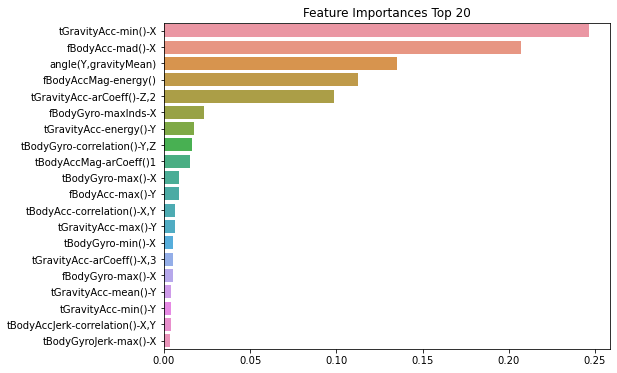

In [28]:

feature_importances = pd.Series(best_df_clf.feature_importances_, index=X_train.columns)

feature_top20 = feature_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=[8, 6])
plt.title('Feature Importances Top 20')
sns.barplot(x=feature_top20, y=feature_top20.index)
plt.show()

In [32]:
#다른방법으로 해보려다가 실패
for name, value in zip(X_train.columns, best_df_clf.feature_importances_):
    print(f'{name}: {value:.4f}')

ekemf 
#for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
 #   print(f'{name}: {value:.4f}')
 #series변수.values 를 호출하면 값(values)만 따로 array로 확인가능
#sns.barplot(x=dt_clf.feature_importances_, y=iris.feature_names);

tBodyAcc-mean()-X: 0.0000
tBodyAcc-mean()-Y: 0.0000
tBodyAcc-mean()-Z: 0.0000
tBodyAcc-std()-X: 0.0000
tBodyAcc-std()-Y: 0.0000
tBodyAcc-std()-Z: 0.0000
tBodyAcc-mad()-X: 0.0000
tBodyAcc-mad()-Y: 0.0000
tBodyAcc-mad()-Z: 0.0000
tBodyAcc-max()-X: 0.0021
tBodyAcc-max()-Y: 0.0000
tBodyAcc-max()-Z: 0.0003
tBodyAcc-min()-X: 0.0000
tBodyAcc-min()-Y: 0.0000
tBodyAcc-min()-Z: 0.0000
tBodyAcc-sma(): 0.0000
tBodyAcc-energy()-X: 0.0000
tBodyAcc-energy()-Y: 0.0000
tBodyAcc-energy()-Z: 0.0000
tBodyAcc-iqr()-X: 0.0000
tBodyAcc-iqr()-Y: 0.0000
tBodyAcc-iqr()-Z: 0.0000
tBodyAcc-entropy()-X: 0.0000
tBodyAcc-entropy()-Y: 0.0000
tBodyAcc-entropy()-Z: 0.0000
tBodyAcc-arCoeff()-X,1: 0.0000
tBodyAcc-arCoeff()-X,2: 0.0000
tBodyAcc-arCoeff()-X,3: 0.0000
tBodyAcc-arCoeff()-X,4: 0.0006
tBodyAcc-arCoeff()-Y,1: 0.0000
tBodyAcc-arCoeff()-Y,2: 0.0000
tBodyAcc-arCoeff()-Y,3: 0.0000
tBodyAcc-arCoeff()-Y,4: 0.0000
tBodyAcc-arCoeff()-Z,1: 0.0000
tBodyAcc-arCoeff()-Z,2: 0.0000
tBodyAcc-arCoeff()-Z,3: 0.0000
tBodyAcc-arC

In [49]:
#plt.figure(figsize=[8, 6])
#plt.title('Feature Importances Top 20') # 20개가 내림차순으로 안되네...
#a = sns.barplot(x=best_df_clf.feature_importances_, y=X_train.columns)
